## 01 서울시 구별 CCTV 현황 분석
### [학습목표]
- 서울시 각 구별 CCTV수 파악, 인구대비 CCTV 비율 확인, 순위
- 인구대비 CCTV 평균치 확인, 부족한 구 확인

In [10]:
import numpy as np
import pandas as pd

In [11]:
# 서울시 연도별 CCTV 현황
CCTV_Seoul = pd.read_csv('./data/01. CCTV_in_Seoul.csv')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [12]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [13]:
CCTV_Seoul = CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'})
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [14]:
# 기관명 => 구별 컬럼명 변경
# CCTV_Seoul.columns[0] 확인
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'}, inplace=True) # 원본에 반영
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [15]:
# 두번째 데이터 => 인구현황, xls file => xlrd module install
pop_Seoul  = pd.read_excel(
    './data/01. population_in_Seoul.xls' # 인코딩 확인
    # , encoding='utf-8'
)
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [16]:
pop_Seoul  = pd.read_excel(
    './data/01. population_in_Seoul.xls'
    , header = 2 # 2번 행을 헤더(컬럼) 사용
    # , parse_cols = 'B,D,G,J,N' # 컬럼 선택
    , usecols=[1,3,6,9,13]
)
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [17]:
pop_Seoul.rename(
    columns={
          pop_Seoul.columns[0] : '구별'
        , pop_Seoul.columns[1] : '인구수'
        , pop_Seoul.columns[2] : '한국인'
        , pop_Seoul.columns[3] : '외국인'
        , pop_Seoul.columns[4] : '고령자'
    }
    , inplace=True
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [18]:
# pd.read_excel?

In [19]:
s=pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [20]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [21]:
dates = pd.date_range('20130101', periods=6, freq='d')
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [22]:
dates = pd.date_range('20130101', periods=6, freq='D')
dates # 인덱스 사용 예정

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [23]:
# 임의의 데이터 생성 6x4
np.random.seed(42)
df = pd.DataFrame(
      np.random.randn(6,4)
    , index=dates
    , columns=['A','B','C','D']
    )
df

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304
2013-01-06,1.465649,-0.225776,0.067528,-1.424748


In [24]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [25]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [26]:
df.values

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
       [-0.23415337, -0.23413696,  1.57921282,  0.76743473],
       [-0.46947439,  0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783, -0.56228753],
       [-1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819]])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [28]:
df.describe

<bound method NDFrame.describe of                    A         B         C         D
2013-01-01  0.496714 -0.138264  0.647689  1.523030
2013-01-02 -0.234153 -0.234137  1.579213  0.767435
2013-01-03 -0.469474  0.542560 -0.463418 -0.465730
2013-01-04  0.241962 -1.913280 -1.724918 -0.562288
2013-01-05 -1.012831  0.314247 -0.908024 -1.412304
2013-01-06  1.465649 -0.225776  0.067528 -1.424748>

In [29]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.081311,-0.275775,-0.133655,-0.262434
std,0.861950,0.862828,1.168366,1.187681
min,-1.012831,-1.913280,-1.724918,-1.424748
25%,-0.410644,-0.232047,-0.796872,-1.199800
50%,0.003904,-0.182020,-0.197945,-0.514009
75%,0.433026,0.201119,0.502648,0.459144
max,1.465649,0.542560,1.579213,1.523030


In [30]:
df['B']

2013-01-01   -0.138264
2013-01-02   -0.234137
2013-01-03    0.542560
2013-01-04   -1.913280
2013-01-05    0.314247
2013-01-06   -0.225776
Freq: D, Name: B, dtype: float64

In [31]:
# ascending = True default
df.sort_values(by = 'B', ascending=False) # 내림차순
# 오름차순은 뒤로 갈수록 숫자가 커짐
# 내림차순은 뒤로 갈수록 숫자가 작아짐

,A,B,C,D
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-06,1.465649,-0.225776,0.067528,-1.424748
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288


In [32]:
# 값에 의해 정렬
df.sort_values(by = 'B') # 오름차순

,A,B,C,D
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-06,1.465649,-0.225776,0.067528,-1.424748
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730


In [33]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [34]:
# 인덱스  1/2~1/4 추출 => [:]
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288


In [35]:
df[0:3]

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730


In [36]:
df.loc[dates[0]]

A    0.496714
B   -0.138264
C    0.647689
D    1.523030
Name: 2013-01-01 00:00:00, dtype: float64

In [37]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.496714,-0.138264
2013-01-02,-0.234153,-0.234137
2013-01-03,-0.469474,0.542560
2013-01-04,0.241962,-1.913280
2013-01-05,-1.012831,0.314247
2013-01-06,1.465649,-0.225776


In [38]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.234153,-0.234137
2013-01-03,-0.469474,0.542560
2013-01-04,0.241962,-1.913280


In [39]:
df.loc['20130102',['A','B']]

A   -0.234153
B   -0.234137
Name: 2013-01-02 00:00:00, dtype: float64

In [40]:
df.loc[dates[0],'A']

0.4967141530112327

In [41]:
df.iloc[3]

A    0.241962
B   -1.913280
C   -1.724918
D   -0.562288
Name: 2013-01-04 00:00:00, dtype: float64

In [42]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.241962,-1.913280
2013-01-05,-1.012831,0.314247


In [43]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.234153,1.579213
2013-01-03,-0.469474,-0.463418
2013-01-05,-1.012831,-0.908024


In [44]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730


In [45]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.138264,0.647689
2013-01-02,-0.234137,1.579213
2013-01-03,0.542560,-0.463418
2013-01-04,-1.913280,-1.724918
2013-01-05,0.314247,-0.908024
2013-01-06,-0.225776,0.067528


In [46]:
df

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304
2013-01-06,1.465649,-0.225776,0.067528,-1.424748


In [47]:
# boolean index
df.A>0

2013-01-01     True
2013-01-02    False
2013-01-03    False
2013-01-04     True
2013-01-05    False
2013-01-06     True
Freq: D, Name: A, dtype: bool

In [48]:
df[df.A>0]

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-06,1.465649,-0.225776,0.067528,-1.424748


In [49]:
df2 = df.copy()

In [50]:
# E 컬럼 추가
df2['E']=['one','one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.496714,-0.138264,0.647689,1.523030,one
2013-01-02,-0.234153,-0.234137,1.579213,0.767435,one
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730,two
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288,three
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304,four
2013-01-06,1.465649,-0.225776,0.067528,-1.424748,three


In [51]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [52]:
# 특정값이 있는 행 선택
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730,two
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304,four


In [53]:
# 누적합
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-02,0.262561,-0.372401,2.226901,2.290465
2013-01-03,-0.206914,0.170159,1.763484,1.824735
2013-01-04,0.035049,-1.743121,0.038566,1.262447
2013-01-05,-0.977782,-1.428874,-0.869458,-0.149856
2013-01-06,0.487866,-1.654650,-0.801930,-1.574605


In [54]:
df.apply(lambda x: x.max() - x.min())

A    2.478480
B    2.455840
C    3.304131
D    2.947778
dtype: float64

In [55]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [56]:
# 적은 구 정렬
CCTV_Seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [57]:
# CCTV_Seoul.sort_values(by='소계', ascending=True).head()
CCTV_Seoul.sort_values(by='소계').head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [58]:
# 비율
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                     CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [59]:
# 서울시 인구 데이터 파악
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [60]:
# 합계 삭제
# pop_Seoul.drop([0] # 원본 반영 X
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [61]:
# 구별 => 키 사용 => 결측치 확인
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [62]:
pop_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 1 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     float64
 2   한국인     25 non-null     float64
 3   외국인     25 non-null     float64
 4   고령자     25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB


In [63]:
pop_Seoul['구별'].isnull()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [64]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [65]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [66]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [67]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [68]:
pop_Seoul.sort_values(by='외국인비율').head()
# pop_Seoul.sort_values(by='외국인비율', ascending=True).head() # 오름차순

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019


In [69]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head() # 내림차순

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [70]:
df1 = pd.DataFrame({
      'A': ['A0', 'A1', 'A2', 'A3']
    , 'B': ['B0', 'B1', 'B2', 'B3']
    , 'C': ['C0', 'C1', 'C2', 'C3']
    , 'D': ['D0', 'D1', 'D2', 'D3']
}
, index=[0, 1, 2, 3])
# 인덱스에 값을 넣게 되면 '명칭'이 된다

df2 = pd.DataFrame({
      'A': ['A4', 'A5', 'A6', 'A7']
    , 'B': ['B4', 'B5', 'B6', 'B7']
    , 'C': ['C4', 'C5', 'C6', 'C7']
    , 'D': ['D4', 'D5', 'D6', 'D7']
}
, index=[0, 1, 2, 3])

df3 = pd.DataFrame({
      'A': ['A8', 'A9', 'A10', 'A11']
    , 'B': ['B8', 'B9', 'B10', 'B11']
    , 'C': ['C8', 'C9', 'C10', 'C11']
    , 'D': ['D8', 'D9', 'D10', 'D11']
}
, index=[8, 9, 10, 11])

df1, df2, df3

(    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     A   B   C   D
 0  A4  B4  C4  D4
 1  A5  B5  C5  D5
 2  A6  B6  C6  D6
 3  A7  B7  C7  D7,
       A    B    C    D
 8    A8   B8   C8   D8
 9    A9   B9   C9   D9
 10  A10  B10  C10  D10
 11  A11  B11  C11  D11)

In [71]:
# concat() - 열 방향으로 합치기 (행 추가)
result = pd.concat([df1, df2, df3])
result
# 인덱스 값을 미리 설정해주었기 때문에 수치가 아닌 '명칭'

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [72]:
# keys 
# 키 값을 줘서 다중 index 구성
result = pd.concat([df1, df2, df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 0    A4   B4   C4   D4
  1    A5   B5   C5   D5
  2    A6   B6   C6   D6
  3    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [73]:
# index 속성 보기
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  0),
            ('y',  1),
            ('y',  2),
            ('y',  3),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [74]:
# index 위치로 확인 0
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [75]:
# index 위치로 확인 1 
result.index.get_level_values(1)

Index([0, 1, 2, 3, 0, 1, 2, 3, 8, 9, 10, 11], dtype='int64')

In [76]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 0    A4   B4   C4   D4
  1    A5   B5   C5   D5
  2    A6   B6   C6   D6
  3    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [77]:
# df1에 새 데이터프레임 추가
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [78]:
df1, df4

(    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     B   D   F
 2  B2  D2  F2
 3  B3  D3  F3
 6  B6  D6  F6
 7  B7  D7  F7)

In [79]:
# result = pd.concat([df1, df4], axis=0)
result = pd.concat([df1, df4])
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [80]:
# axis=1 : 열 추가
result = pd.concat([df1, df4], axis=1)
result
# 없는 index에는 NaN이 들어감

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [81]:
# join='inner' 
# 값이 없는 index 행 삭제
result = pd.concat([df1, df4],
                   axis=1,  # 열 추가
                   join='inner') # 교집합 / NaN있는 행은 삭제)
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [82]:
# ignore_index = True 
# index 무시하고 병합 후 index 재설정
result = pd.concat([df1, df4], ignore_index=True)
result

# index 무시하고 섞여서 병함됨

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [83]:
result = pd.concat([df1, df4], ignore_index=False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [84]:
left = pd.DataFrame({
      'key': ['K0', 'K4', 'K2', 'K3']
    , 'A': ['A0', 'A1', 'A2', 'A3']
    , 'B': ['B0', 'B1', 'B2', 'B3']
})

right = pd.DataFrame({
      'key': ['K0', 'K1', 'K2', 'K3']
    , 'C': ['C0', 'C1', 'C2', 'C3']                  
    , 'D': ['D0', 'D1', 'D2', 'D3']
})

In [85]:
left, right

(  key   A   B
 0  K0  A0  B0
 1  K4  A1  B1
 2  K2  A2  B2
 3  K3  A3  B3,
   key   C   D
 0  K0  C0  D0
 1  K1  C1  D1
 2  K2  C2  D2
 3  K3  C3  D3)

In [86]:
# merge(on='컬럼명')
# 같은 key를 기준으로 병함 (inner join)

pd.merge(left, right, on='key') # 여기서 key는 옵션명이 아니라 컬럼명

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [87]:
pd.merge(left, right, how='left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [88]:
# left join() : left에 있는 데이터는 다 있어야 해
# how 옵션 추가
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [89]:
# right join
# how 옵션
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [90]:
# outer join
# 교차/ 있는 데이터 다 가져오고 빈자리는 NaN
# how 옵션
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [91]:
# inner join - default
# 교집합
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [92]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404


In [93]:
pd.merge(CCTV_Seoul, pop_Seoul, on='구별').head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [94]:
# CCTV와 Population 데이터 merge로 병합
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [95]:
# 의미 없는 컬럼 지우기
# del -객체 지우는 명령어
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [96]:
data_result_cp = data_result
data_result_cp.index = data_result_cp['구별']
data_result_cp.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,
강남구,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [97]:
# set_index()
# 인덱스 만들기 
# 향후 그래프 등 그릴 때 편리하게 활용하기 위해 '구별' 인덱스 생성
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [98]:
data_result.reindex()
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [99]:
import numpy as np

In [100]:
# np.corrcoef() - 상관계수 함수
np.corrcoef(data_result['고령자비율'], data_result['소계'])

# 상관계수 : -0.28078554  -> 상관이 거의 없음

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [101]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])
# 상관계수 :  -0.13607433  -> 상관 거의 없음

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [102]:
np.corrcoef(data_result['인구수'], data_result['소계'])
# 상관계수 : 0.30634228  -> 위 두 변수에 비해서는 그나마 약한 상관관계가 있다

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [103]:
# CCTV 별 내림차순 정렬
data_result.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [104]:
# 인구수 별 내림차순 정렬
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [105]:
# 그래프 그리기
import matplotlib.pyplot as plt  
%matplotlib inline

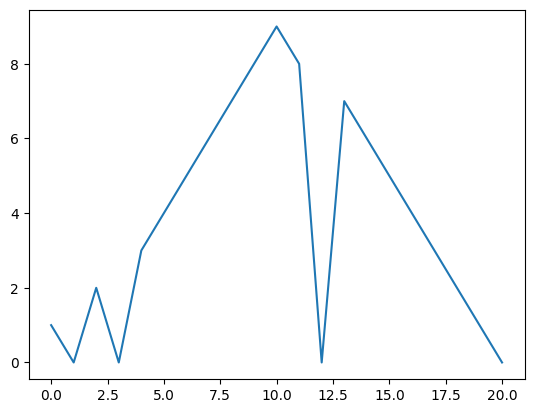

In [106]:
# 1. 도화지 => 메모리 영역 확보
plt.figure()

# 2. 그리기 => 메모리상에 그리기
plt.plot([1,0,2,0,3,4,5,6,7,8,9,8,0,7,6,5,4,3,2,1,0]) # plot() : 선그래프 

# 3. show() => 출력
plt.show()

In [107]:
import numpy as np
t = np.arange(0,14,0.01)
t

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.397e+01, 1.398e+01,
       1.399e+01])

In [108]:
y = np.sin(t)
y

array([0.        , 0.00999983, 0.01999867, ..., 0.98606011, 0.98767468,
       0.98919048])

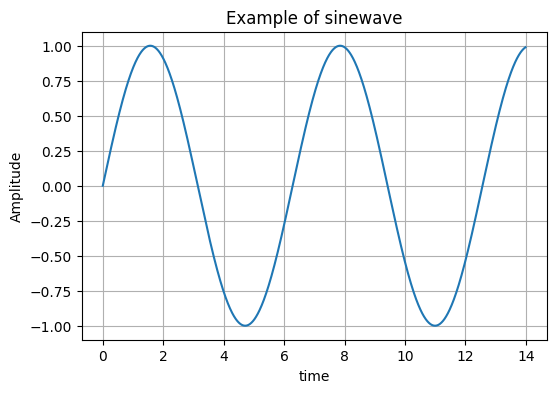

In [109]:
plt.figure(figsize=(6,4))
plt.plot(t, y)
plt.grid()               # 그리드 적용하기
plt.xlabel('time')       # x축 라벨 적용하기
plt.ylabel('Amplitude')  # y축 라벨 적용하기
plt.title('Example of sinewave') # 그래프의 제목 
plt.show()

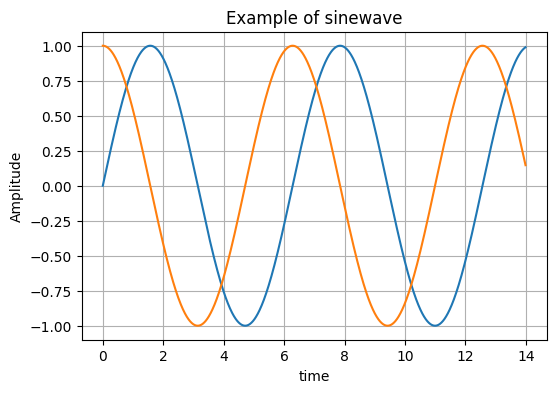

In [110]:
plt.figure(figsize=(6,4))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t)) # 그래프 추가
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

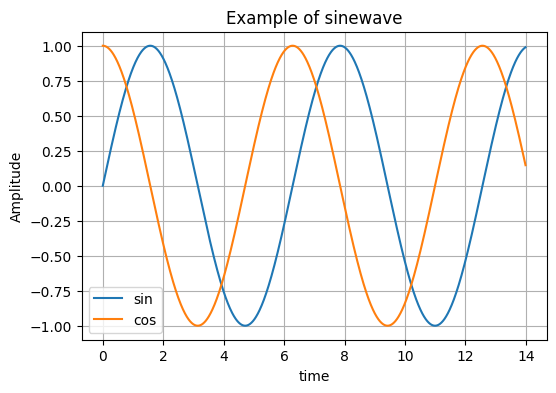

In [111]:
plt.figure(figsize=(6, 4))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos') 
plt.grid()
plt.legend()                        # 범례 표시 
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

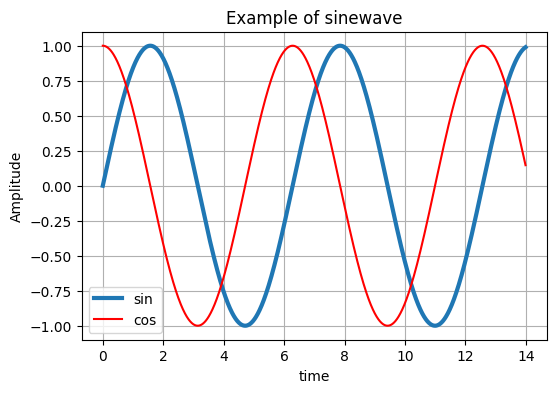

In [112]:
plt.figure(figsize=(6, 4))
plt.plot(t, np.sin(t), lw=3, label='sin') # lw : 선의 굵기 조정 
plt.plot(t, np.cos(t), color='r', label='cos')  #  color : 색상 지정
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

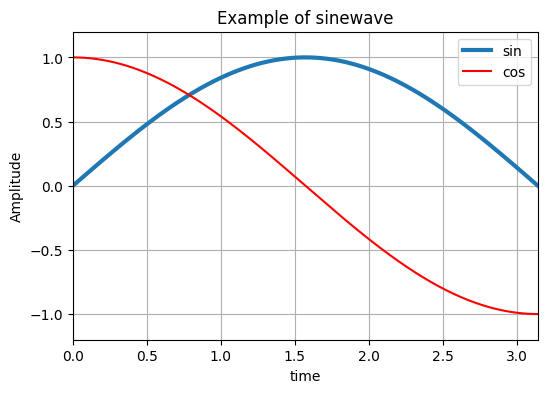

In [113]:
plt.figure(figsize=(6, 4))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2) # y축의 범위 지정
# plt.ylim(-0.5, 0.5) # y축의 범위 지정
plt.xlim(0, np.pi)  # x축의 범위 지정
plt.show()

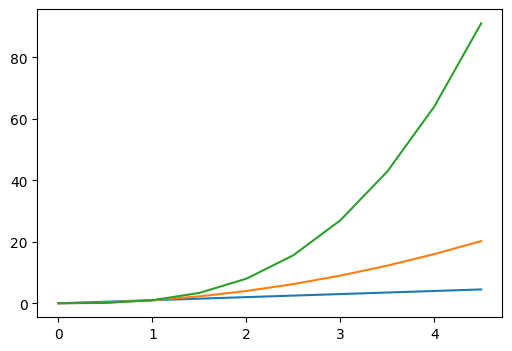

In [114]:
# 상세한 스타일 지정
t = np.arange(0, 5, 0.5) # 변수 생성

plt.figure(figsize=(6,4)) 
plt.plot(t, t) # 빨간색 점선
plt.plot(t, t**2) # 파란색 사각형 모형
plt.plot(t, t**3) # 초록색 삼각형 모형
plt.show()

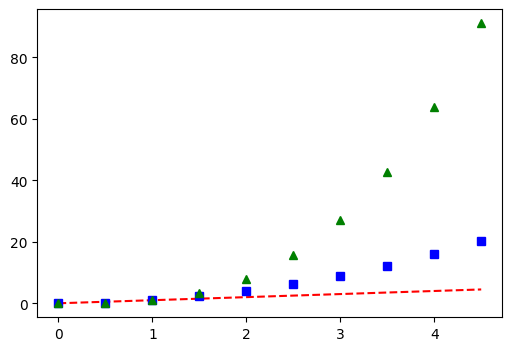

In [115]:
# 상세한 스타일 지정
t = np.arange(0, 5, 0.5) # 변수 생성

plt.figure(figsize=(6,4)) 
plt.plot(t, t, 'r--') # 빨간색 점선
plt.plot(t, t**2, 'bs') # 파란색 사각형 모형 b : blue, s : squere
plt.plot(t, t**3, 'g^') # 초록색 삼각형 모형 g : green, ^ : tri
plt.show()

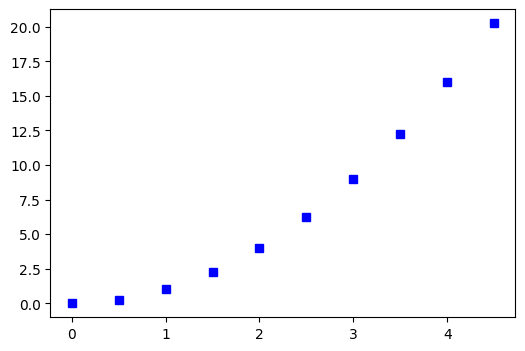

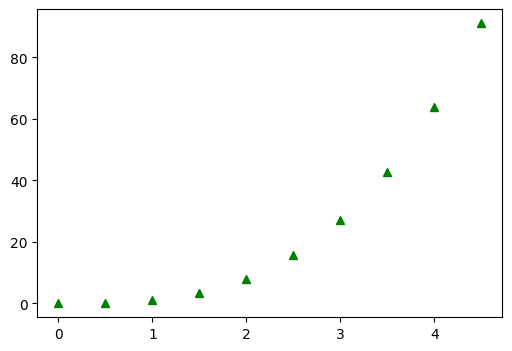

In [116]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(6,4))
pl1 = plt.plot(t, t**2, 'bs') # 첫 번째 그래프

plt.figure(figsize=(6,4))
pl2 = plt.plot(t, t**3, 'g^') # 두 번째 그래프 

plt.show()

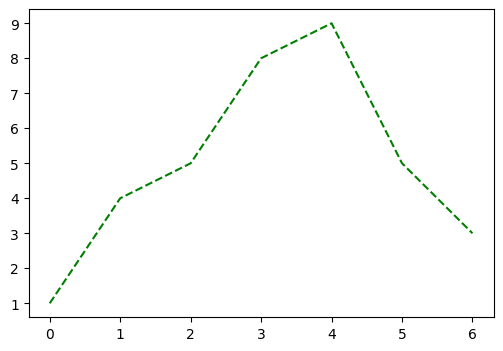

In [117]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(6,4))
plt.plot(t, y, 'g--')
plt.show()

# dashed('--') # dotted(':') solid(default) dashdot('-.')
# 색깔 지정 'green', g'
# b, g, r, c, m, y, k, w,	
# tab:red, blue, green, orange, cyan, purple, brown, pink, gray, olive

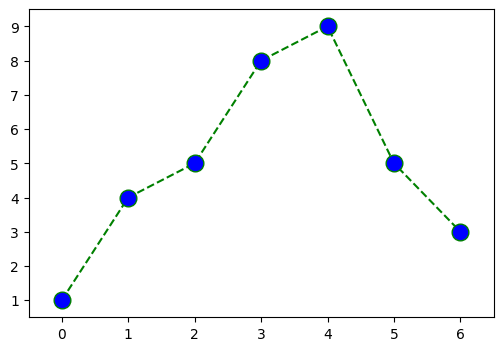

In [118]:
plt.figure(figsize=(6,4))
plt.plot(t, y, color='green' # 선색 지정
         , linestyle='dashed' # 선의 스타일 지정
         , marker='o' # 점의 모양 설정
         , markerfacecolor = 'blue' # 마커 색 지정 (점의 면색)
         , markersize=12) # 마커 크기 지정 (점의 크기)

plt.xlim([-0.5, 6.5]) # x축 제한 
plt.ylim([0.5, 9.5]) # y축 제한 
plt.show()

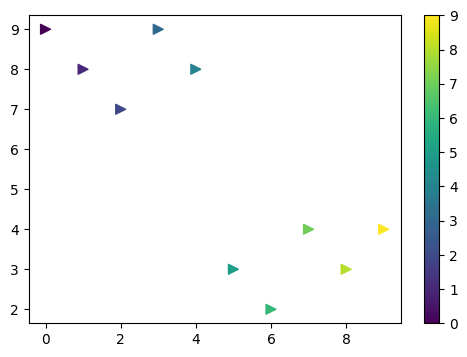

In [119]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

colormap = t # x축인 t에 따라 색상을 바꿈 

# 산점도
plt.figure(figsize=(6,4))
plt.scatter(t,y, s = 50, c = colormap, marker='>') # s는 마커의 크기 
plt.colorbar() # colorbar 생성 
plt.show()

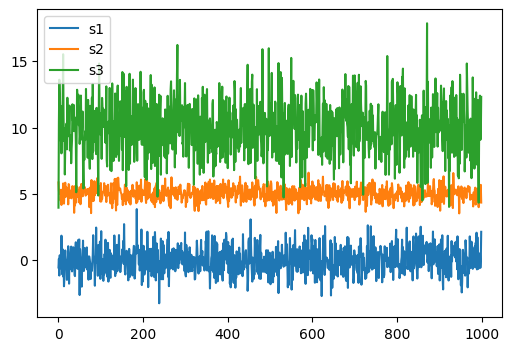

In [120]:
# 랜덤변수 함수로 데이터 3개 만들기, loc 옵션으로 평균, scale 옵션으로 표준편차 지정 
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

plt.figure(figsize=(6,4))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

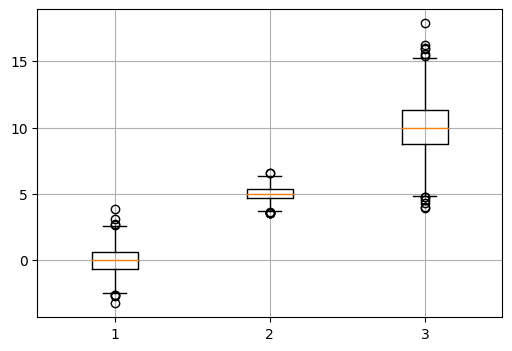

In [121]:
plt.figure(figsize=(6,4))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

In [122]:
# 차트 한글처리
import platform
from matplotlib import font_manager, rc

# Mac
# rc('font', family='AppleGothic')
# windows
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System...Sorry~~~~')

In [123]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


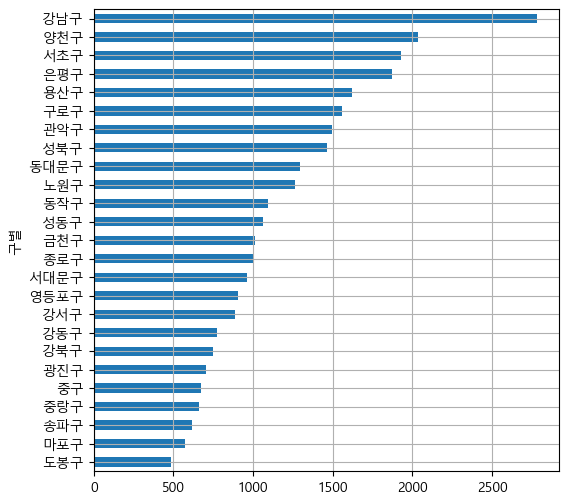

In [125]:
plt.figure()
# data_result['소계'].plot(kind='barh', grid=True, figsize=(6,6))
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(6,6))
plt.show()

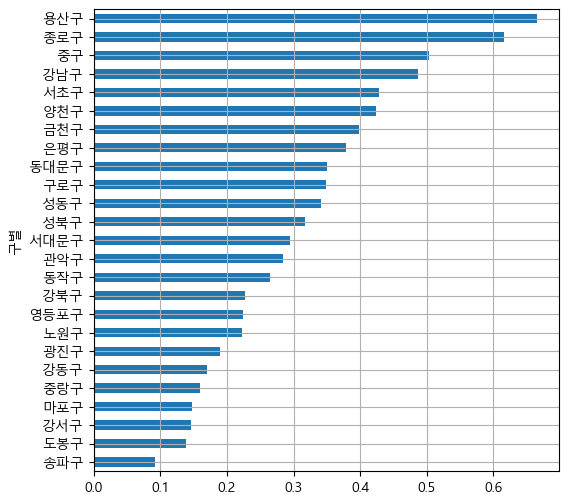

In [126]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(6,6))
plt.show()

In [128]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [129]:
fx = np.linspace(0, 100, 5)
fx

array([  0.,  25.,  50.,  75., 100.])

In [130]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100) # 100000부터 700000까지 100개의 구간
f1,fx

(poly1d([1.30916415e-03, 6.45066497e+02]),
 array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
        124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
        148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
        172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
        196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
        221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
        245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
        269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
        293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
        318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
        342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
        366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
        390909.09090909, 396969.6969697 , 403

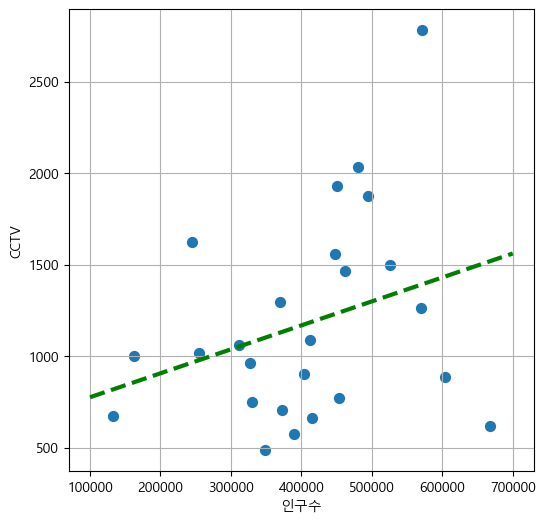

In [131]:
# 인구수와 CCTV 개수 분포 확인

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') # 선그래프
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [132]:
# 오차 구하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
data_result['오차']

구별
강남구     1388.055355
강동구      465.422892
강북구      329.342026
강서구      551.503155
관악구      162.948104
광진구      425.290264
구로구      329.592918
금천구       35.989293
노원구      125.483618
도봉구      616.501341
동대문구     165.202586
동작구       94.122892
마포구      581.180999
서대문구     111.376568
서초구      695.403794
성동구        9.464016
성북구      215.068447
송파구      900.911312
양천구      760.563512
영등포구     268.640012
용산구      659.231690
은평구      580.698457
종로구      143.775396
중구       148.499528
중랑구      527.718965
Name: 오차, dtype: float64

In [133]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [134]:
# 오차가 큰 구 추출
df_sort = data_result.sort_values(by='오차')
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
성동구,1062,81.780822,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,0.341211,9.464016
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.397911,35.989293
동작구,1091,139.338235,412520.0,400456.0,12064.0,56013.0,2.924464,13.578251,0.264472,94.122892
서대문구,962,48.578199,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797,0.294043,111.376568
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.222170,125.483618


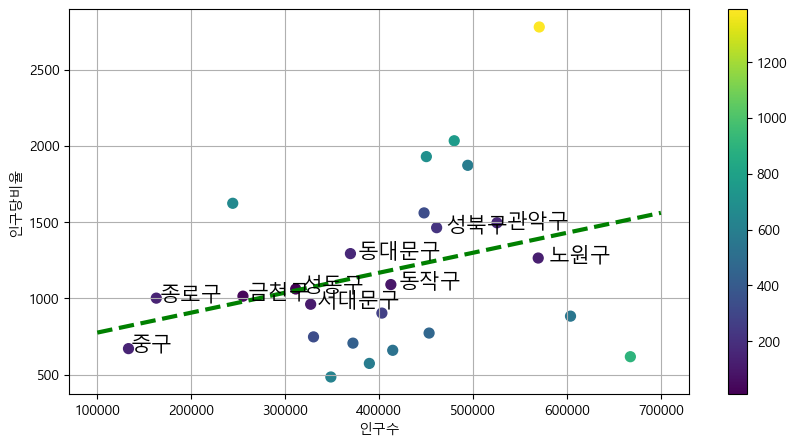

In [135]:
# 인구수와 CCTV 개수 분포 확인
plt.figure(figsize=(10,5))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') # 선그래프

# 오차(df_sort)가 큰 10개 구이름 표시
for n in range(10):
    plt.text(
          df_sort['인구수'][n] * 1.02 # x축 위치 -> 
        , df_sort['소계'][n] * 0.98 # y축 위치, 아래 방향
        , df_sort.index[n] # 출력할 텍스트 값
        , fontsize=15
    )

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()